# Titanic


In [3]:
import seaborn as sns
import pandas as pd
import numpy as np

In [5]:
titanic = sns.load_dataset("titanic")   # importamos un dataset de informacion con la informacion de titanic

In [4]:
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
titanic['survived'] = pd.Categorical(titanic['survived'])  # .Categorial(lista_arreglo)  # convierte todos los elementos de esa coluimna a un tipo categoria
titanic['pclass'] =  pd.Categorical(titanic['pclass'])
titanic['sex'] =  pd.Categorical(titanic['sex'])
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Tablas de contigencia de una variable

In [137]:
tabla = pd.crosstab(index = titanic['survived'], columns = 'cantidad_pasajeros')
# pd.crosstab(arreglo_lista_datos, nombre_columna)   // permite realizar la frecuencia absoluta al arreglo pasado como primer parametro
# Adicional crea otro dataset || dataframe 
tabla

col_0,cantidad_pasajeros
survived,
0,549
1,342


In [13]:
type(tabla)  # type(variable)   // permite ver el tipo de dato de la variable

pandas.core.frame.DataFrame

In [25]:
genero = pd.crosstab(index = titanic['sex'], columns = 'cantidad_pasajeros')
genero

col_0,cantidad_pasajeros
sex,
female,314
male,577


In [20]:
genero/genero.sum()   # // dividiendo para cada elemento de genero el total de la sumatoria
                        # // de esta forma se obtiene la frecuencia relativa

col_0,cantidad_pasajeros
sex,
female,0.352413
male,0.647587


# Tablas de contingencia de dos variables

In [31]:
survived_sex = pd.crosstab(index= titanic['survived'], columns= titanic['sex'])
# pd.crosstab(lista_o_arreglo_filas, lista_o_arreglo_columnas)
survived_sex.index = ["died", "survived"] 
# .index[valor1, valor2]  # cambia en el mismo orden, el nombre de los indices

survived_sex

sex,female,male
died,81,468
survived,233,109


In [35]:
survived_class = pd.crosstab(index = titanic['survived'], columns= titanic['pclass'])
survived_class.index = ["murio", "sobrevivio"] 
survived_class.columns = ["Primera clase", "Segunda clase", "Tercera clase"]

survived_class

,Primera clase,Segunda clase,Tercera clase
murio,80,97,372
sobrevivio,136,87,119


In [40]:
survived_class = pd.crosstab(index = titanic['survived'], columns= titanic['pclass'], margins=True)
survived_class.index = ["murio", "sobrevivio","total_clase"] 
survived_class.columns = ["Primera clase", "Segunda clase", "Tercera clase", "total_pasajeros"]

# margins=True  agrega la sumatoria de los datos en filas y columnas
# como se adiciona una fila y una columna en el .index y el .columns es necesario colocarle el nombre

survived_class

,Primera clase,Segunda clase,Tercera clase,total_pasajeros
murio,80,97,372,549
sobrevivio,136,87,119,342
total_clase,216,184,491,891


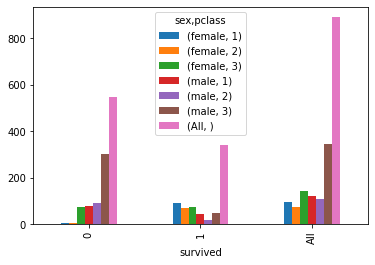

In [112]:
surv_sex_class.plot(kind='bar')

# Frecuencias relativas globales

In [93]:
survived_class/survived_class.loc['total_clase','total_pasajeros']

# dividimos cada valor de survived_class, por el total de pasajeros
# para llegar a esa psosicion usamos .loc[nombre_fila, nombre_columna]

,Primera clase,Segunda clase,Tercera clase,total_pasajeros
murio,0.089787,0.108866,0.417508,0.616162
sobrevivio,0.152637,0.097643,0.133558,0.383838
total_clase,0.242424,0.206510,0.551066,1.000000


# Frecuencias relativas marginales

In [49]:
survived_class/survived_class.loc['total_clase']   # frecuencia relativa de clase por sobreviviencia
# para cada posicion de survived_class lo dividira por la sumatoria de la clase (columna)
# .loc(nombre_fila)  // si solo se pasa un parametro, acceder a la fila

,Primera clase,Segunda clase,Tercera clase,total_pasajeros
murio,0.37037,0.527174,0.757637,0.616162
sobrevivio,0.62963,0.472826,0.242363,0.383838
total_clase,1.00000,1.000000,1.000000,1.000000


In [65]:
# otra forma de obtener el resultado anterior
survived_class.div(survived_class.loc['total_clase'], axis=1)   # axis   0 filas  1 columnas

,Primera clase,Segunda clase,Tercera clase,total_pasajeros
murio,0.37037,0.527174,0.757637,0.616162
sobrevivio,0.62963,0.472826,0.242363,0.383838
total_clase,1.00000,1.000000,1.000000,1.000000


In [58]:
survived_class.transpose()/survived_class['total_pasajeros']  # obteniendo la participacion % de las clases vs si sobrevivio o no
# .transpose()  pasa las columnas del dataset a las filas, y las filas a las columnas
#  ['nombre_columna']  aunque se halla traspasado la organizacion, internamente le indicamos a python que la operacion se hace por la columna

,murio,sobrevivio,total_clase
Primera clase,0.145719,0.397661,0.242424
Segunda clase,0.176685,0.254386,0.206510
Tercera clase,0.677596,0.347953,0.551066
total_pasajeros,1.000000,1.000000,1.000000


In [61]:
# otra forma de obtener el resultado anterior
survived_class.div(survived_class['total_pasajeros'], axis=0)

# .div(arreglo_columna_datos, eje_a_divirir_por_primer_parametro)   permite dividir un dataset, por una columna, especificando el eje

,Primera clase,Segunda clase,Tercera clase,total_pasajeros
murio,0.145719,0.176685,0.677596,1.0
sobrevivio,0.397661,0.254386,0.347953,1.0
total_clase,0.242424,0.206510,0.551066,1.0


# Tablas multidimencionales

In [94]:
surv_sex_class = pd.crosstab(index = titanic['survived'],
                            columns=[titanic['sex'], titanic['pclass']],
                          margins=True)

#surv_sex_class.index = ['Murio', 'Vivio', 'Total_pasajeros_genero_estado']
# Se obtiene la frecuencia absoluta de 3 variables , surivied como indice y en columnas como agrupacion sex y pclass

surv_sex_class

sex      female          male            All
pclass        1   2    3    1    2    3     
survived                                    
0             3   6   72   77   91  300  549
1            91  70   72   45   17   47  342
All          94  76  144  122  108  347  891

In [76]:
surv_sex_class['female']  # accediendo al dataset que es como una matriz, por el indice
#surv_sex_class['female'][1]

pclass,1,2,3
Murio,3,6,72
Vivio,91,70,72
Total_pasajeros_genero_estado,94,76,144


In [101]:
surv_sex_class/surv_sex_class.loc['All']

# Cada valor de surv_sex_class / los valores que genera la agrupacion sex, pclass en la columna All


sex         female                     male                           All
pclass           1         2    3         1         2         3          
survived                                                                 
0         0.031915  0.078947  0.5  0.631148  0.842593  0.864553  0.616162
1         0.968085  0.921053  0.5  0.368852  0.157407  0.135447  0.383838
All       1.000000  1.000000  1.0  1.000000  1.000000  1.000000  1.000000

# Frecuencias acumuladas

In [144]:
notas_estudiantes =  [1,1,1,1,2,2,3,3,3,3,3,3,5,5,5,5,4,4,4,1,1,1] # 22 Estudiantes con sus notas con un total sum 61

notas_estudiantes

[1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 4, 4, 4, 1, 1, 1]

In [139]:
notas_con_indice = pd.Series(notas_estudiantes)
notas_con_indice

0     1
1     1
2     1
3     1
4     2
5     2
6     3
7     3
8     3
9     3
10    3
11    3
12    5
13    5
14    5
15    5
16    4
17    4
18    4
19    1
20    1
21    1
dtype: int64

In [175]:
frecuencia_absoluta =pd.crosstab(index=notas_con_indice, columns='cantidad')  # frecuencia absoluta

frecuencia_absoluta

col_0,cantidad
row_0,
1,7
2,2
3,6
4,3
5,4


In [151]:
frecuencia_absoluta / frecuencia_absoluta.sum()*100  # frecuencia relativa 

col_0,cantidad
row_0,
1,31.818182
2,9.090909
3,27.272727
4,13.636364
5,18.181818


In [153]:
frecuencia_absoluta.cumsum() # frecuencia absoluta acumuluativa
# .cunsum()  permite obtener la aculacion del valor anterior hacia adelante en cada posicion

col_0,cantidad
row_0,
1,7
2,9
3,15
4,18
5,22


In [154]:
frecuencia_absoluta.cumsum() / frecuencia_absoluta.sum() * 100
# frecuencia relativa acumulada

col_0,cantidad
row_0,
1,31.818182
2,40.909091
3,68.181818
4,81.818182
5,100.000000


In [212]:

frecuencia_relativa = frecuencia_absoluta/frecuencia_absoluta.sum() * 100
frecuencia_absoluta_acumulada = frecuencia_absoluta.cumsum()
frecuencia_relativa_acumulada =  frecuencia_absoluta_acumulada / frecuencia_absoluta_acumulada.sum() * 100

resumen = pd.DataFrame({
 'frecuencia_absoluta' : frecuencia_absoluta.to_numpy().flatten(),
 'frecuencia_relativa' : frecuencia_relativa.to_numpy().flatten().round(),
 'frecuencia_absoluta_acumulada' : frecuencia_absoluta_acumulada.to_numpy().flatten(),
  'frecuencia_relativa_acumulada' : frecuencia_relativa_acumulada.to_numpy().flatten().round()
},
index=[1,2,3,4,5])

resumen


# .cumsum()   permite generar un datafreame con la frecuencia acumulada
# .to_numpy()  convierte un datafreame en un arreglo numpy
# .flatten()   permite unificar varios arreglos en uno solo




,frecuencia_absoluta,frecuencia_relativa,frecuencia_absoluta_acumulada,frecuencia_relativa_acumulada
1,7,32.0,7,10.0
2,2,9.0,9,13.0
3,6,27.0,15,21.0
4,3,14.0,18,25.0
5,4,18.0,22,31.0
